In [18]:
import numpy as np
import scipy.linalg as la

In [19]:
N = 9
n = N - 1
L = 10.0
dx = L / N
D = 1.0
xs_a = 0.1
S = 1.0 

def diffusion_matrix(D, xs_a): #finite difference
    A = np.zeros((n, n))
    for i in range(n):
        A[i, i] = 2 * D / dx**2 + xs_a
        if i > 0:
            A[i, i - 1] = -D / dx**2
        if i < n - 1:
            A[i, i + 1] = -D / dx**2
    return A

A = diffusion_matrix(D, xs_a)
b = np.full(n, S * dx)
b_norm = b / np.linalg.norm(b)

classical_solution = la.solve(A, b_norm)
ref_solution = classical_solution / np.linalg.norm(classical_solution)
print("Classical solution:", classical_solution)
print("Reference solution:", ref_solution)
print("A", A)

Classical solution: [0.93901142 1.55746451 1.93171149 2.10795571 2.10795571 1.93171149
 1.55746451 0.93901142]
Reference solution: [0.1959472  0.32500224 0.40309783 0.43987541 0.43987541 0.40309783
 0.32500224 0.1959472 ]
A [[ 1.72 -0.81  0.    0.    0.    0.    0.    0.  ]
 [-0.81  1.72 -0.81  0.    0.    0.    0.    0.  ]
 [ 0.   -0.81  1.72 -0.81  0.    0.    0.    0.  ]
 [ 0.    0.   -0.81  1.72 -0.81  0.    0.    0.  ]
 [ 0.    0.    0.   -0.81  1.72 -0.81  0.    0.  ]
 [ 0.    0.    0.    0.   -0.81  1.72 -0.81  0.  ]
 [ 0.    0.    0.    0.    0.   -0.81  1.72 -0.81]
 [ 0.    0.    0.    0.    0.    0.   -0.81  1.72]]


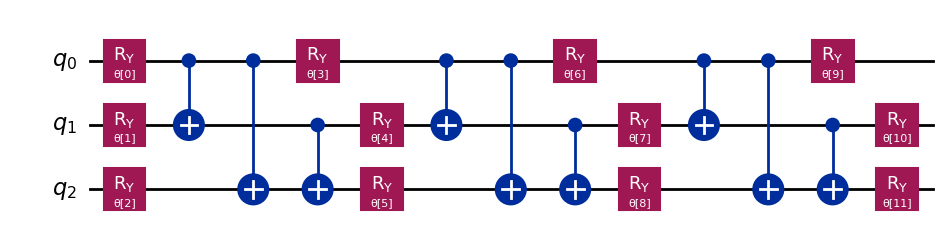

In [20]:
from qiskit.circuit.library.n_local.real_amplitudes import RealAmplitudes
size = n
nqbit = int(np.log2(size))
ansatz = RealAmplitudes(nqbit, entanglement="full", reps=3, insert_barriers=False)
ansatz.decompose().draw("mpl")

In [23]:
from qiskit_ibm_runtime import (
    QiskitRuntimeService,
    Estimator,
    Session,
    EstimatorOptions,
)
from vqls_prototype import VQLS, VQLSLog
from qiskit_algorithms import optimizers as opt

# make sure your IBMQ account is saved
# Initialize the Qiskit Runtime Service with your IBM Quantum account credentials.

try:
    # start the runtime service
    service = QiskitRuntimeService()
    backend_name = "ibm_brisbane"
    backend = QiskitRuntimeService().backend(backend_name)

    # start session
    with Session(backend=backend) as session:
        # options of the primitives
        options = EstimatorOptions()
        options.resilience_level = 0

        # estimator
        estimator = Estimator(mode=session, options=options)

        # log
        log = VQLSLog([], [])

        # declare the solver
        vqls = VQLS(estimator, ansatz, optimizer=opt.CG(maxiter=200))

        # solve the linear system
        solution = vqls.solve(A, b)
except Exception as e:
    print("Error:", e)


/Users/melekderman/miniforge3/envs/vqls/lib/python3.8/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:863: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)
/Users/melekderman/miniforge3/envs/vqls/lib/python3.8/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:863: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the migration guide at https://docs.quantum.ibm.com/migration-guides/classic-iqp-to-cloud-iqp
  warnings.warn(warning_message)
/Users/melekderman/miniforge3/envs/vqls/lib/python3.8/site-packages/qiskit_ibm_runtime/qiskit_runtime_service.py:863: UserWarning: IBM Quantum Platform is moving, and this version will be sunset on July 1. To get started on the new platform, read the m

Error: 'The primitive to evaluate the Hadammard Test failed!'
